In [1]:
import numpy as np
import tensorflow as tf

2025-03-30 21:54:41.582992: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
from keras.preprocessing import image

In [2]:
flower_categories = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

In [4]:
model = tf.keras.models.load_model('flowers.keras')

In [5]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 96)     │       153,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 96)     │       230,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,634,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,149,516 (76.86 MB)

 Trainable params: 10,074,757 (38.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,074,759 (38.43 MB)

In [10]:
img_path = '../flowers_kaggle/Test/Dandelion/483097906_2c35054346.jpg'
test_image = image.load_img(img_path, target_size=(224,224))

In [11]:
test_image = image.img_to_array(test_image)
print(test_image.shape)

(224, 224, 3)


In [13]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 224, 224, 3)

In [14]:
result = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


In [16]:
print(result) # -> This means: Dandelion

[[0. 1. 0. 0. 0.]]


In [18]:
%pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp312-cp312-macosx_12_0_x86_64.whl

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import cv2
from matplotlib import pyplot as plt

In [22]:
image_to_test = cv2.imread(img_path)
image_to_test.shape

(375, 500, 3)

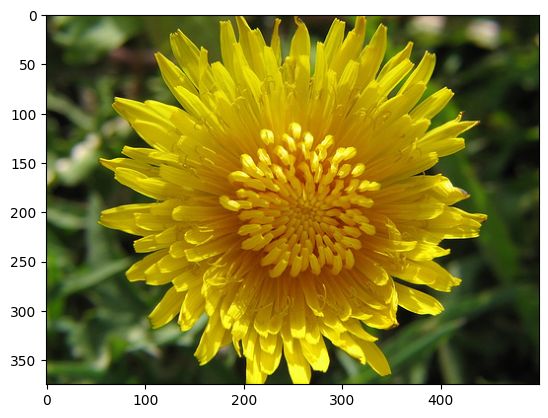

In [26]:
plt.imshow(cv2.cvtColor(image_to_test, cv2.COLOR_BGR2RGB))

In [ ]:
### It is indeed...a DANDELION !!